In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ax
%matplotlib inline

In [ ]:
df_wm = pd.read_csv('Walmart_DataSet.csv')
df_wm

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df_wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df_wm['Date'] = pd.to_datetime(df_wm['Date'], dayfirst = True)
df_wm

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df_wm.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

Feature Name             Description
Store                    Store number
Date                     Week of Sales
Weekly_Sales             Sales for the given store in that week
Holiday_Flag             If it is a holiday week
Temperature              Temperature on the day of the sale
Fuel_Price               Cost of the fuel in the region
CPI                      Consumer Price Index
Unemployment             Unemployment Rate

In [ ]:
df_wm.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Here Holiday_Flag is Categorical type column
Date is Date type column

In [ ]:
# NumCols = ['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
NumCols=df_wm.select_dtypes(exclude='object')
NumCols

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?   

b. If the weekly sales show a seasonal trend, when and what could be the reason?    

c. Does temperature affect the weekly sales in any manner?    

d. How is the Consumer Price index affecting the weekly sales of various stores?    

e. Top performing stores according to the historical data.    

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.    

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.


In [ ]:
df_wm['Store'].nunique()

45

In [ ]:
df_wm['Unemployment'].nunique()

349

In [ ]:
#  a. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
affect_unemployment = df_wm.groupby(['Unemployment','Store'])[['Weekly_Sales']].sum()

affect_unemployment.sort_values(by=['Weekly_Sales','Store'])


,,Weekly_Sales
Unemployment,Store,
6.895,33,1065369.52
6.228,36,1137224.17
5.422,5,1301302.62
5.217,44,1360020.41
6.034,3,1684307.82
...,...,...
7.127,4,30889467.22
7.082,20,31152336.70
5.143,4,31478429.92


In [ ]:
# Reset the index to 'Unemployment' and 'Store' columns
affect_unemployment_reset = affect_unemployment.reset_index()

# Find the row with the minimum 'Weekly_Sales'
min_sales_row = affect_unemployment_reset.loc[affect_unemployment_reset['Weekly_Sales'].idxmin()]

# Display the 'Store' with minimum 'Weekly_Sales'
min_store = min_sales_row['Store']

print(f"Store with minimum weekly sales: {min_store}")


Store with minimum weekly sales: 33.0


<Axes: >

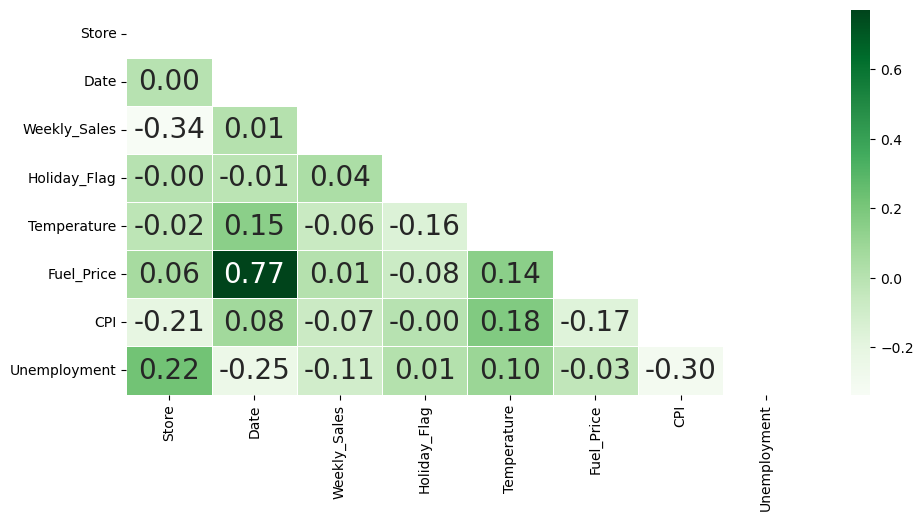

In [ ]:
corr=df_wm.corr()
plt.figure(figsize=(11,5))
sns.heatmap(corr,mask=np.triu(corr),fmt='.2f',annot=True,cmap="Greens",linewidths=.5, annot_kws={"size": 20})



In [ ]:
df_wm

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


b. If the weekly sales show a seasonal trend, when and what could be the reason?



In [ ]:
df_wm.set_index('Date', inplace=True)

In [ ]:
# Plot the overall sales trend
weekly_sales = df_wm.groupby(df_wm.index)['Weekly_Sales'].sum()
weekly_sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

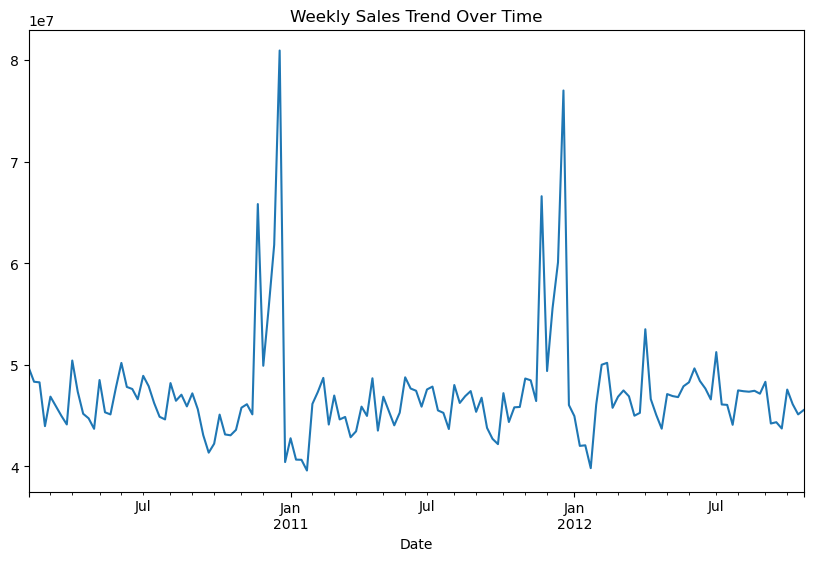

In [ ]:
# Plotting weekly sales
plt.figure(figsize=(10, 6))
weekly_sales.plot(title='Weekly Sales Trend Over Time')
plt.show()

c. Does temperature affect the weekly sales in any manner?



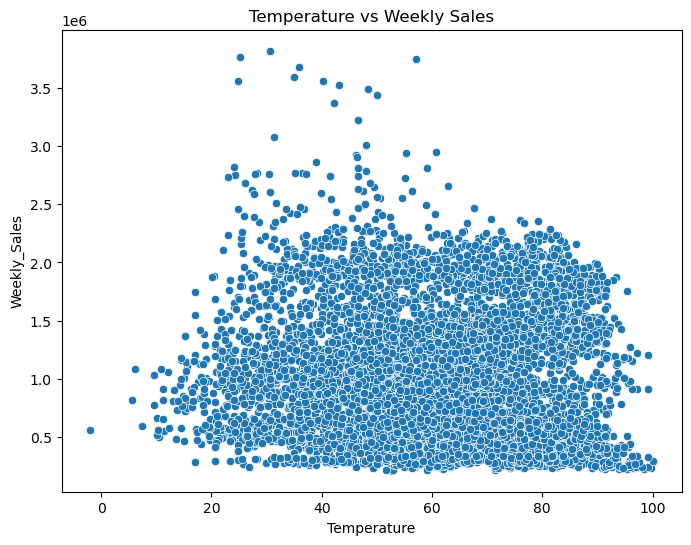

Correlation between Temperature and Weekly Sales: -0.0638100131794696


In [ ]:
# Scatter plot to visualize relationship between temperature and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df_wm)
plt.title('Temperature vs Weekly Sales')
plt.show()

# Correlation between Temperature and Weekly Sales
temp_corr = df_wm['Weekly_Sales'].corr(df_wm['Temperature'])
print(f"Correlation between Temperature and Weekly Sales: {temp_corr}")



d. How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
# Store-wise correlation between CPI and Weekly Sales
cpi_corr = df_wm.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']))
cpi_corr_sorted = cpi_corr.sort_values()
print(cpi_corr_sorted)

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.115374
28   -0.095908
29   -0.072530
2    -0.062431
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
6    -0.011357
25   -0.010914
20    0.058706
11    0.069781
12    0.084087
23    0.084248
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
13    0.163976
32    0.196782
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
4     0.351157
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
dtype: float64


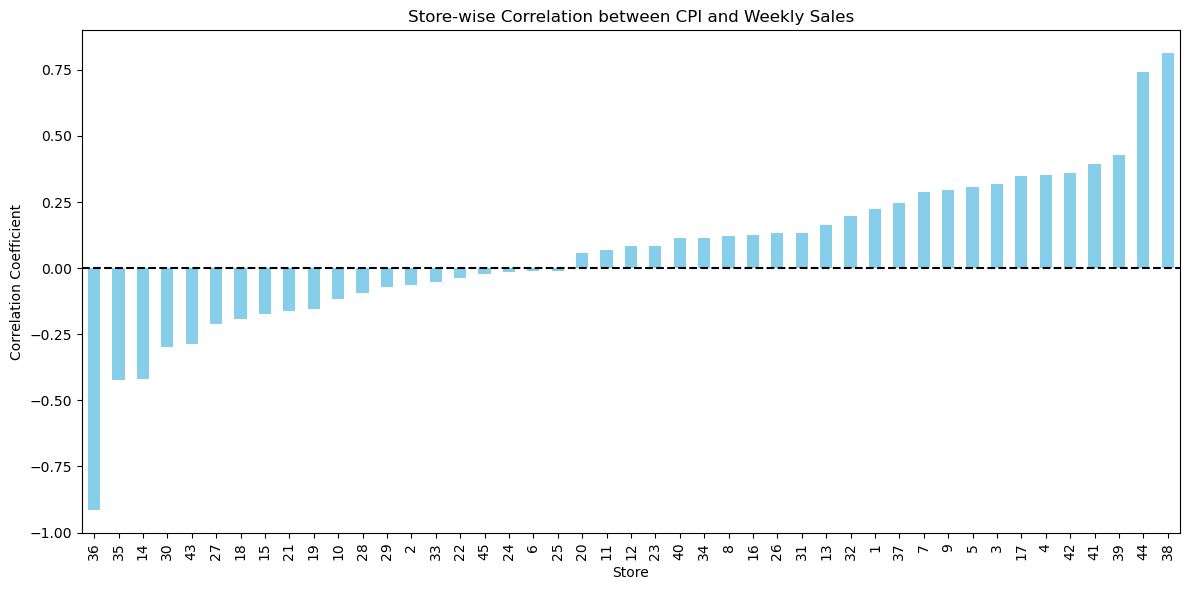

In [ ]:
# Plotting the correlations using a bar plot
plt.figure(figsize=(12, 6))
cpi_corr_sorted.plot(kind='bar', color='skyblue')
plt.title('Store-wise Correlation between CPI and Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linestyle='--')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


e. Top performing stores according to the historical data.


Top performing stores: Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


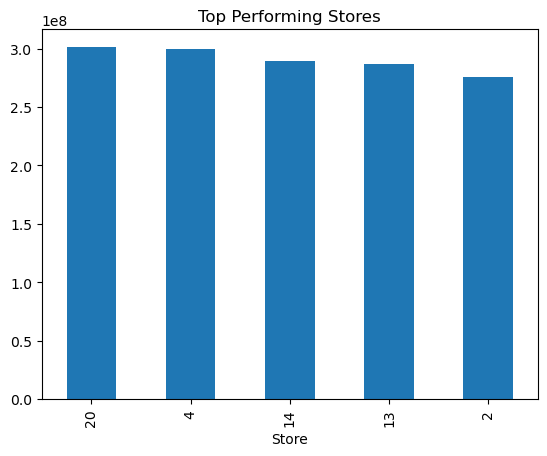

In [ ]:
# Calculating total sales per store
store_sales = df_wm.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Displaying top-performing stores
top_stores = store_sales.head(5)
print("Top performing stores:", top_stores)

# Plotting top-performing stores
top_stores.plot(kind='bar', title='Top Performing Stores')
plt.show()


f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

Worst performing store: Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
Name: Weekly_Sales, dtype: float64


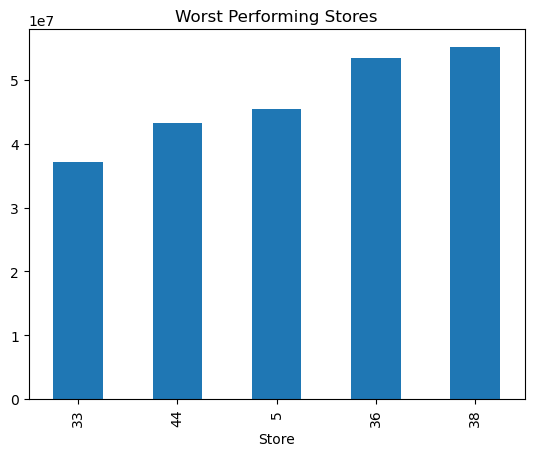

In [ ]:
# Worst performing store
worst_store = df_wm.groupby('Store')['Weekly_Sales'].sum().sort_values()
print("Worst performing store:", worst_store.head(5))

# Plotting top-performing stores
(worst_store.head(5)).plot( kind='bar', title='Worst Performing Stores')
plt.show()

In [ ]:
# Difference between the highest and lowest
performance_difference = store_sales.max() - store_sales.min()
print(f"Difference between top and worst performing stores: {performance_difference}")

Difference between top and worst performing stores: 264237570.49999997


In [ ]:
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### ARIMA and Seasonal ARIMA   
### Autoregressive Integrated Moving Averages
##### The general process for ARIMA models is the following:  
    Visualize the Time Series Data   
    Make the time series data stationary   
    Plot the Correlation and AutoCorrelation Charts   
    Construct the ARIMA Model or Seasonal ARIMA based on the data  
    Use the model to make predictions

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index('Date', inplace=True)


In [ ]:
# Iterate over each store
for store_id in df['Store'].unique():
    # Filter the data for each store
    store_data = df[df['Store'] == store_id]['Weekly_Sales']
store_data

Date
2010-02-05    890689.51
2010-02-12    656988.64
2010-02-19    841264.04
2010-02-26    741891.65
2010-03-05    777951.22
                ...    
2012-09-28    713173.95
2012-10-05    733455.07
2012-10-12    734464.36
2012-10-19    718125.53
2012-10-26    760281.43
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
store_data.dtype

dtype('float64')

In [ ]:
import pandas as pd

# Convert Series to DataFrame
store_data_df = pd.DataFrame(store_data)

# Optionally rename the column if it's unnamed or if you want a specific name
store_data_df = store_data_df.rename(columns={store_data.name: 'Weekly_Sales'})
store_data_df

,Weekly_Sales
Date,
2010-02-05,890689.51
2010-02-12,656988.64
2010-02-19,841264.04
2010-02-26,741891.65
2010-03-05,777951.22
...,...
2012-09-28,713173.95
2012-10-05,733455.07
2012-10-12,734464.36


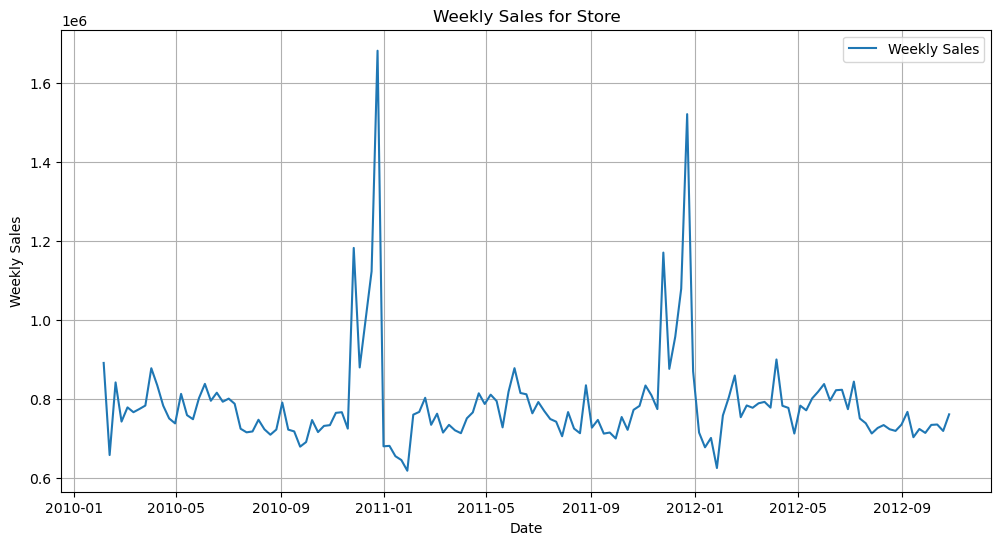

In [ ]:

# Plotting store_data
plt.figure(figsize=(12, 6))
plt.plot(store_data_df, label='Weekly Sales')
plt.title('Weekly Sales for Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


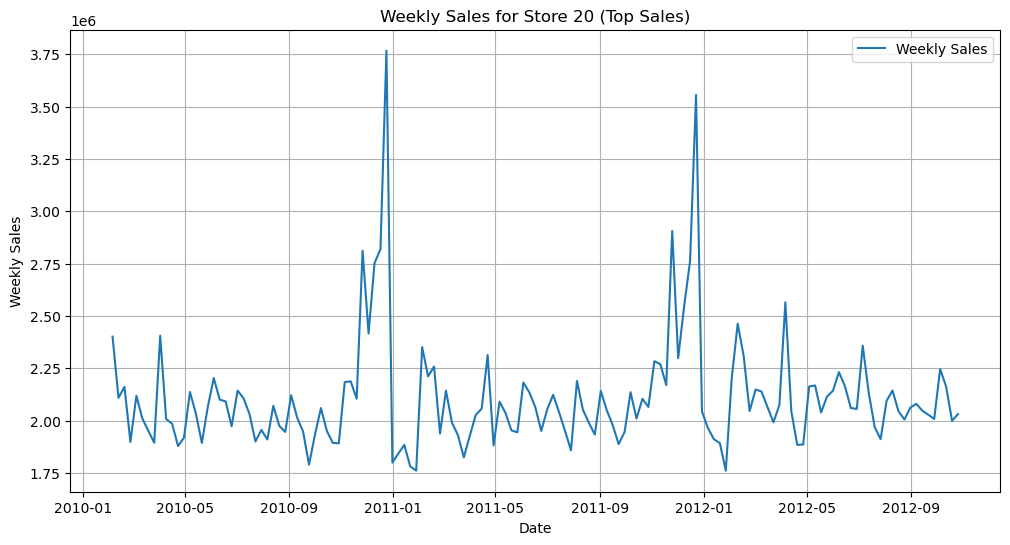

In [ ]:
store20_data = df[df['Store'] ==20]['Weekly_Sales']
store20_data_df = pd.DataFrame(store20_data)
plt.figure(figsize=(12, 6))
plt.plot(store20_data_df, label='Weekly Sales')
plt.title('Weekly Sales for Store 20 (Top Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

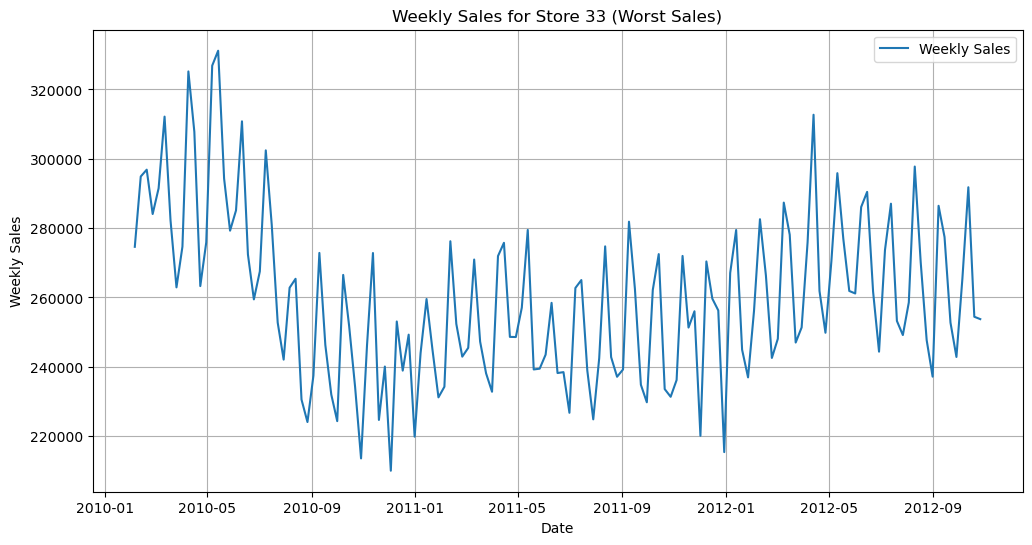

In [ ]:
store33_data = df[df['Store'] ==33]['Weekly_Sales']
store33_data_df = pd.DataFrame(store33_data)
plt.figure(figsize=(12, 6))
plt.plot(store33_data.index, store33_data.values, label='Weekly Sales')
plt.title('Weekly Sales for Store 33 (Worst Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def test_stationarity(dataFrame, var):
    dataFrame['RollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['RollStd']  = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats.map('{:.7f}'.format))

    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    p_value=stats[1]
    if p_value <=0.05:
        print('stationarity is present')
    else:
        print('no stationarity')

    plt.figure(figsize=(15,6))
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var, color='blue', label=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='RollMean',color='orange', label='Rolling Mean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='RollStd',color='green', label='Rolling Std')
    plt.legend()

Test Statistic                  -5.5728988
p-value                          0.0000015
#lags used                       4.0000000
number of observations used    138.0000000
dtype: object
criticality 1% : -3.47864788917503
criticality 5% : -2.882721765644168
criticality 10% : -2.578065326612056
stationarity is present


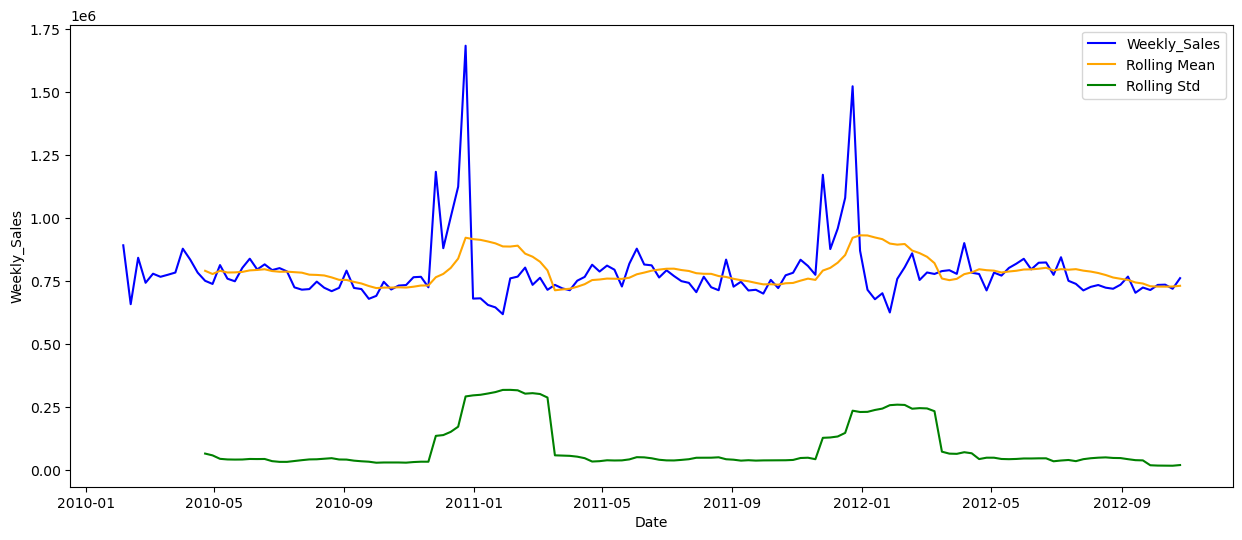

In [ ]:
test_stationarity(store_data_df.dropna(),'Weekly_Sales')

In visualisation its not stationary.   
In Statistical test its stationary.  
Lets proceed it with stationary.


<Axes: title={'center': 'Weekly Sales After Seasonal Differencing (Lag 20)'}, xlabel='Date'>

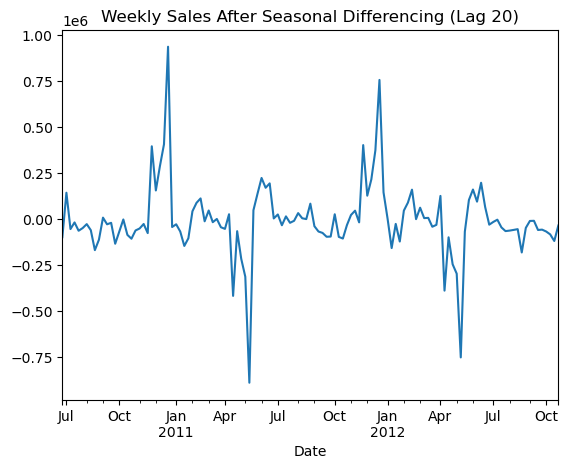

In [ ]:
store_data_df['Seasonal_Diff'] = store_data_df['Weekly_Sales'] - store_data_df['Weekly_Sales'].shift(20)
store_data_df['Seasonal_Diff'].dropna().plot(title="Weekly Sales After Seasonal Differencing (Lag 20)")

C:\Users\Dell\AppData\Local\Temp\ipykernel_15148\1739574390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['RollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_15148\1739574390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['RollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -5.4094896
p-value                          0.0000032
#lags used                       4.0000000
number of observations used    118.0000000
dtype: object
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913
stationarity is present


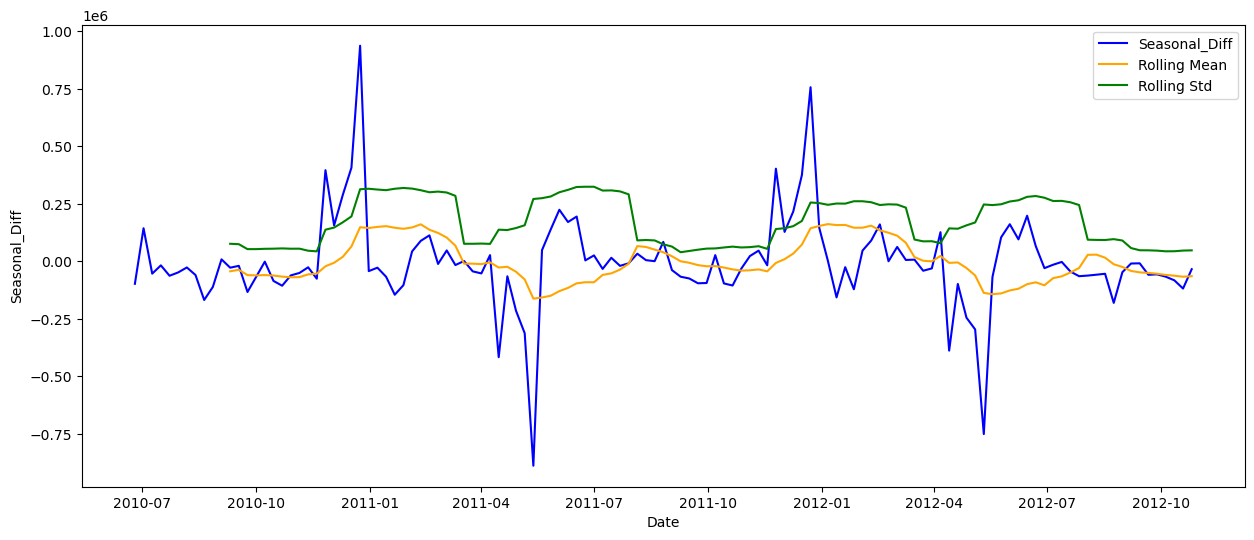

In [ ]:
test_stationarity(store_data_df.dropna(),'Seasonal_Diff')

To visually analyze the components of a time series, seasonal decomposition is a powerful technique.   
In Python, you can use seasonal_decompose from the statsmodels library, which splits a time series into trend, seasonal, and residual components.   
Interpretation:  

Observed: The original data series.  

Trend: The overall upward or downward movement in the data over time.  

Seasonal: The repeating pattern over a fixed period (weekly, yearly, etc.).  

Residual: The noise or irregular component after removing trend and seasonality.  

This plot provides a comprehensive view of each component, helping you understand the nature of seasonality and trends in your data. Let me know if you need help with interpretation!

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

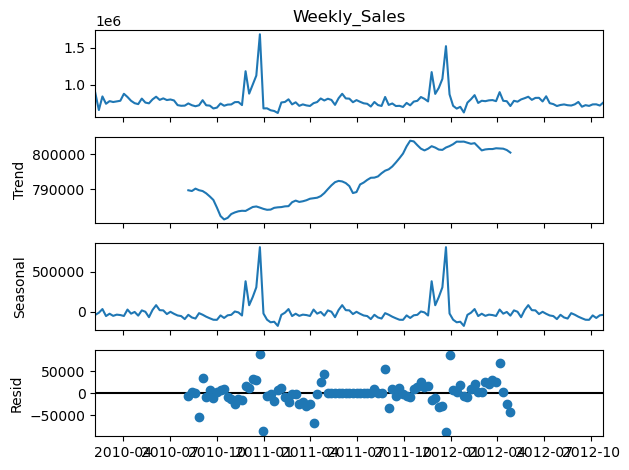

In [ ]:
decom=seasonal_decompose(store_data_df['Weekly_Sales'].dropna())
decom.plot();


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1500x500 with 0 Axes>

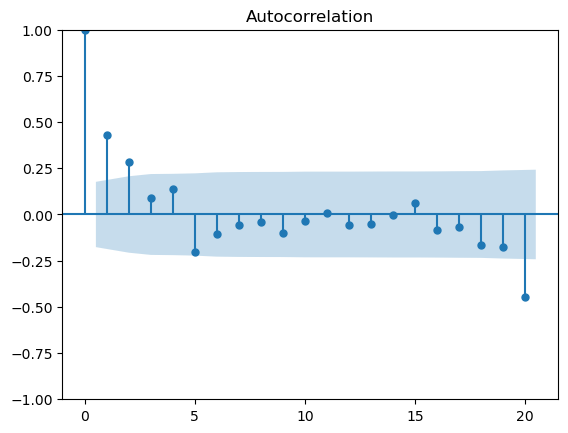

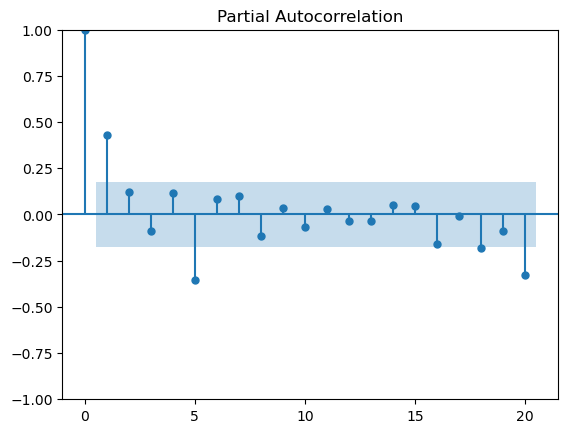

In [ ]:
plt.figure(figsize=(15,5))
plot_acf(store_data_df['Seasonal_Diff'].dropna(),lags=20);
plot_pacf(store_data_df['Seasonal_Diff'].dropna(),lags=20);

Analyzing the Plots for ARIMA Parameters:  
d (Differencing Order):   
    Since stationarity test had a very low p-value (0.000001), the data seems to be stationary. Therefore, we might set
d=0.If there’s still some trend in the data, we can consider d=1, but starting with d=0 is a good approach.   

q (MA Order) - Based on the ACF Plot:  
    The ACF plot shows a significant spike at lag 1 and possibly at lag 2, then drops to nearly zero and fluctuates within the confidence interval afterward.  
    This pattern suggests an MA(1) (Moving Average) or possibly MA(2) component. Therefore, q could be 1 or 2.  
    
p (AR Order) - Based on the PACF Plot:

The PACF plot shows a significant spike at lag 1 and possibly a weaker spike at lag 2, followed by values within the confidence interval.
This suggests an Auto-Regressive (AR), AR(1) or possibly AR(2) component. So p could be 1 or 2.   

Suggested ARIMA Model(s):   

Based on this analysis, here are some possible initial ARIMA models to try:  

ARIMA(1, 0, 1) – for a simple model with AR(1) and MA(1) components.  

ARIMA(1, 0, 2) or ARIMA(2, 0, 1) – if you suspect there could be a stronger influence from either the AR or MA component.   

You can fit these models and use the AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values to compare and find the best model. Lower AIC/BIC values indicate a better fit.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

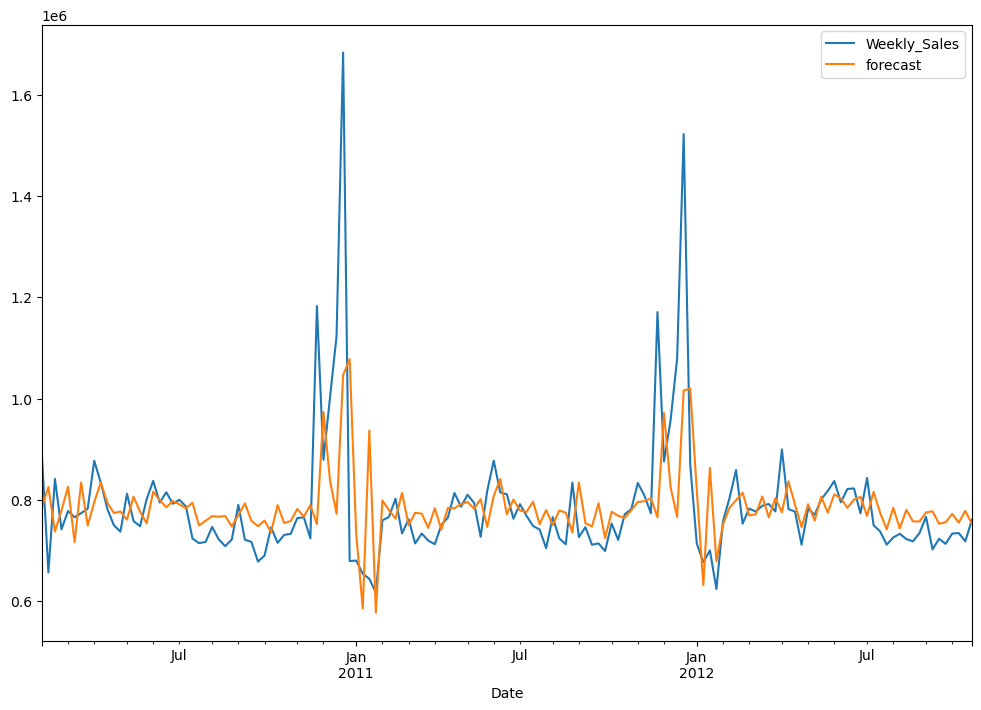

In [ ]:
ar_model = ARIMA(store_data_df['Weekly_Sales'], order=(1,0,2))
ar_model_fit  = ar_model.fit()
prediction=ar_model_fit.predict()
store_data_df['forecast']=prediction
store_data_df[['Weekly_Sales','forecast']].plot(figsize=(12,8))


Forecasted values for the next 12 weeks:
2012-11-02    781184.420801
2012-11-09    793528.061835
2012-11-16    780437.932131
2012-11-23    790053.429529
2012-11-30    782990.261150
2012-12-07    788178.588439
2012-12-14    784367.446100
2012-12-21    787166.962229
2012-12-28    785110.547154
2013-01-04    786621.109253
2013-01-11    785511.509405
2013-01-18    786326.578063
Freq: W-FRI, Name: predicted_mean, dtype: float64


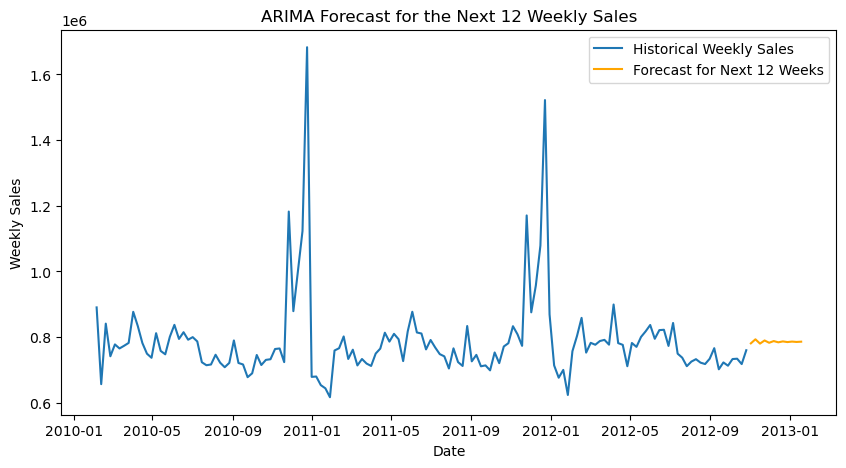

In [ ]:
forecast = ar_model_fit.forecast(steps=12)
print("Forecasted values for the next 12 weeks:")
print(forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(store_data_df['Weekly_Sales'], label='Historical Weekly Sales')
plt.plot(forecast, label='Forecast for Next 12 Weeks', color='orange')
plt.title('ARIMA Forecast for the Next 12 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Date'>

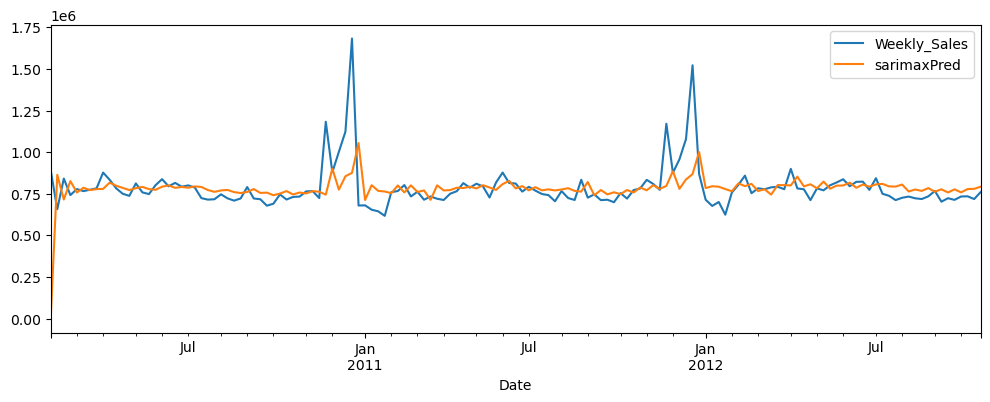

In [ ]:
sar_model = SARIMAX(store_data_df['Weekly_Sales'],order=(1,0,2),seasonal_order=(1,0,2,12))
sar_model_fit = sar_model.fit()
prediction = sar_model_fit.predict()
store_data_df['sarimaxPred'] = prediction
store_data_df[['Weekly_Sales','sarimaxPred']].plot(figsize=(12,4))


Forecasting next 24 weekly sales for stores

Forecasted values for the next 24 weeks:
2012-11-02    762431.919881
2012-11-09    773259.112747
2012-11-16    775016.111468
2012-11-23    787859.733297
2012-11-30    768106.233052
2012-12-07    772033.166508
2012-12-14    772891.056248
2012-12-21    787396.066375
2012-12-28    770139.008014
2013-01-04    778430.831232
2013-01-11    786019.623822
2013-01-18    804006.530269
2013-01-25    768609.375968
2013-02-01    768861.226849
2013-02-08    770241.967811
2013-02-15    782898.548318
2013-02-22    768015.847246
2013-03-01    766034.504573
2013-03-08    768285.378120
2013-03-15    780995.785489
2013-03-22    766400.776482
2013-03-29    773823.464957
2013-04-05    779112.543386
2013-04-12    799055.477944
Freq: W-FRI, Name: predicted_mean, dtype: float64


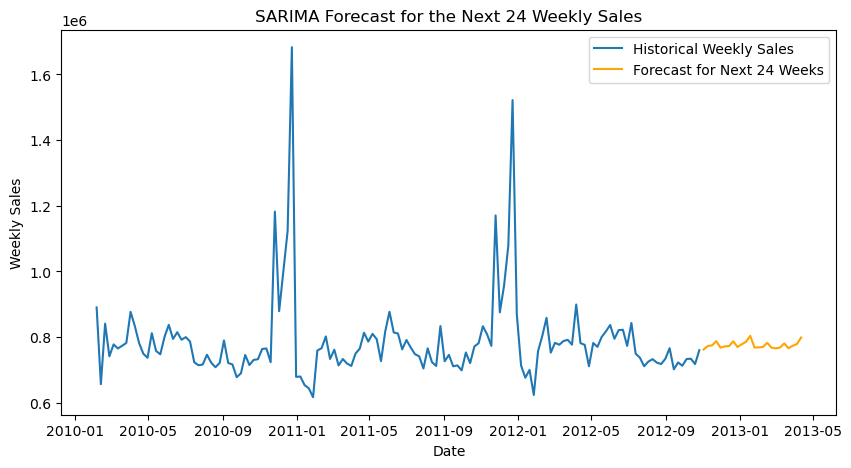

In [ ]:
sforecast = sar_model_fit.forecast(steps=24)
print("Forecasted values for the next 24 weeks:")
print(sforecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(store_data_df['Weekly_Sales'], label='Historical Weekly Sales')
plt.plot(sforecast, label='Forecast for Next 24 Weeks', color='orange')
plt.title('SARIMA Forecast for the Next 24 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
sar33_model = SARIMAX(store33_data_df['Weekly_Sales'],order=(1,0,2),seasonal_order=(1,0,2,12))
sar33_model_fit = sar33_model.fit()
prediction = sar33_model_fit.predict()
store33_data_df['sarimaxPred'] = prediction
store33_data_df[['Weekly_Sales','sarimaxPred']].plot(figsize=(12,4))

s33forecast = sar33_model_fit.forecast(steps=24)
print("Forecasted values for the Store 33 for the next 24 weeks:")
print(s33forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(store33_data_df['Weekly_Sales'], label='Historical Weekly Sales')
plt.plot(s33forecast, label='Forecast for Next 24 Weeks', color='orange')
plt.title('SARIMA Forecast for the Store 33(Worst Performing store)  for the Next 24 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Forecasting next 24 weekly sales for worst performing store 33

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Forecasted values for the Store 33 for the next 24 weeks:
2012-11-02    259618.884513
2012-11-09    264276.740087
2012-11-16    265954.260047
2012-11-23    260079.231385
2012-11-30    256467.840522
2012-12-07    261234.123353
2012-12-14    270483.634308
2012-12-21    260118.635623
2012-12-28    259248.460078
2013-01-04    262883.831819
2013-01-11    266997.372251
2013-01-18    261584.116297
2013-01-25    254547.510090
2013-02-01    261821.321785
2013-02-08    265467.106435
2013-02-15    267295.840776
2013-02-22    256660.425604
2013-03-01    258693.841293
2013-03-08    265875.741215
2013-03-15    263680.931089
2013-03-22    261747.077077
2013-03-29    255841.710636
2013-04-05    264483.589968
2013-04-12    261706.125321
Freq: W-FRI, Name: predicted_mean, dtype: float64


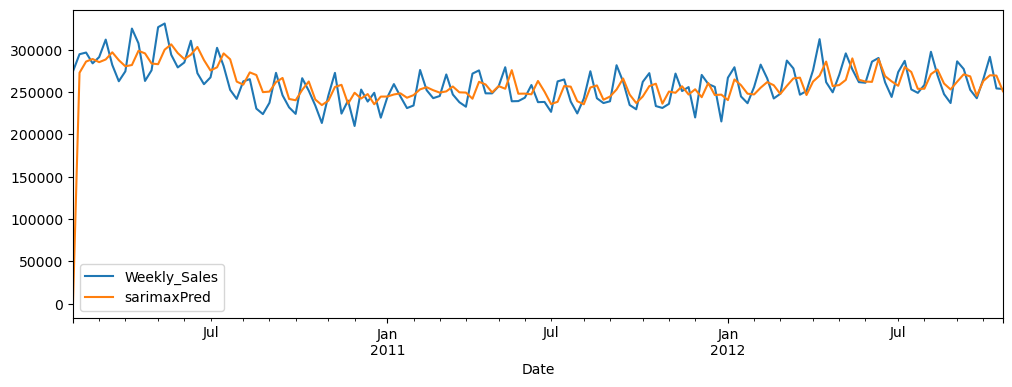

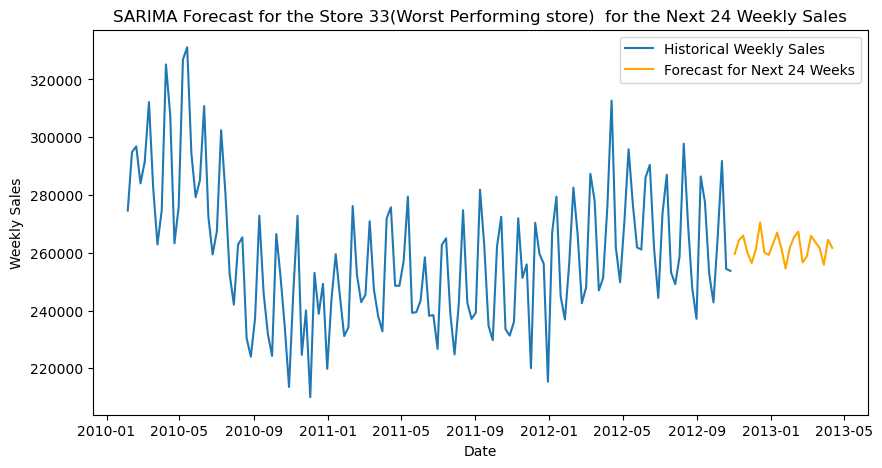

In [ ]:
sar33_model = SARIMAX(store33_data_df['Weekly_Sales'],order=(1,0,2),seasonal_order=(1,0,2,12))
sar33_model_fit = sar33_model.fit()
prediction = sar33_model_fit.predict()
store33_data_df['sarimaxPred'] = prediction
store33_data_df[['Weekly_Sales','sarimaxPred']].plot(figsize=(12,4))

s33forecast = sar33_model_fit.forecast(steps=24)
print("Forecasted values for the Store 33 for the next 24 weeks:")
print(s33forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(store33_data_df['Weekly_Sales'], label='Historical Weekly Sales')
plt.plot(s33forecast, label='Forecast for Next 24 Weeks', color='orange')
plt.title('SARIMA Forecast for the Store 33(Worst Performing store)  for the Next 24 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Forecasting next 24 weekly sales for top performing store 20

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Forecasted values for the Store 20 for the next 24 weeks:
2012-11-02    2.060381e+06
2012-11-09    2.100323e+06
2012-11-16    2.109645e+06
2012-11-23    2.122143e+06
2012-11-30    2.094636e+06
2012-12-07    2.099671e+06
2012-12-14    2.109876e+06
2012-12-21    2.125897e+06
2012-12-28    2.082992e+06
2013-01-04    2.110820e+06
2013-01-11    2.123369e+06
2013-01-18    2.161294e+06
2013-01-25    2.091506e+06
2013-02-01    2.095980e+06
2013-02-08    2.101809e+06
2013-02-15    2.117976e+06
2013-02-22    2.093544e+06
2013-03-01    2.095217e+06
2013-03-08    2.103376e+06
2013-03-15    2.118130e+06
2013-03-22    2.094723e+06
2013-03-29    2.113254e+06
2013-04-05    2.112630e+06
2013-04-12    2.150893e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


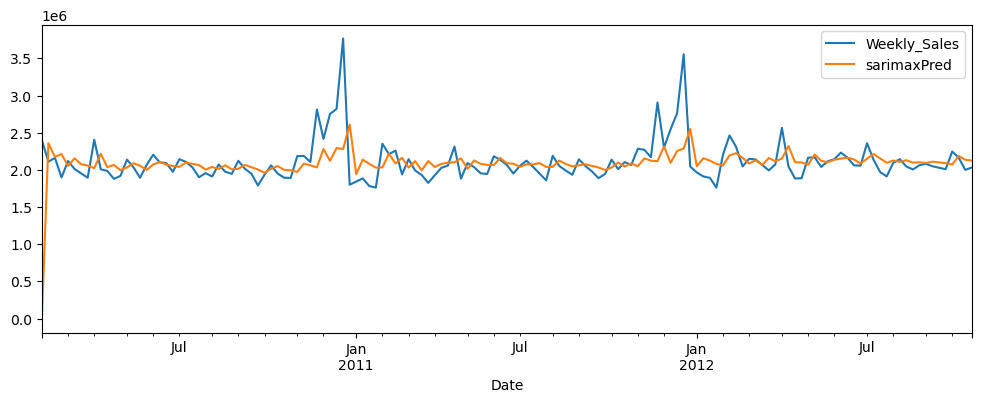

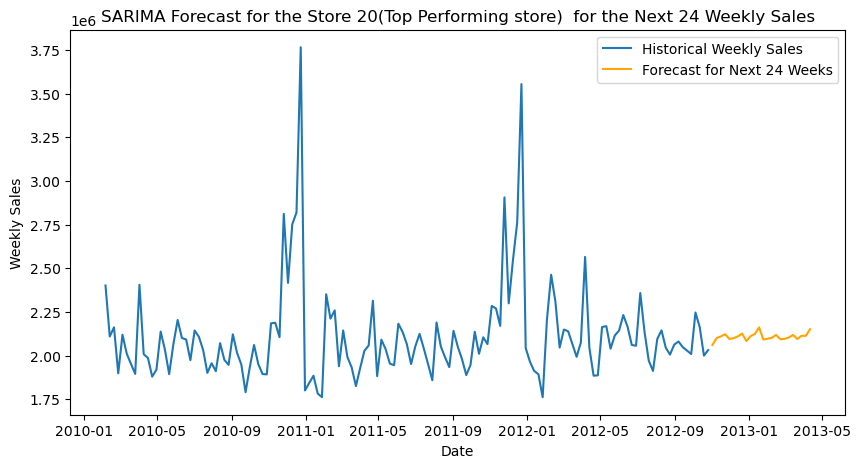

In [ ]:
sar20_model = SARIMAX(store20_data_df['Weekly_Sales'],order=(1,0,2),seasonal_order=(1,0,2,12))
sar20_model_fit = sar20_model.fit()
prediction = sar20_model_fit.predict()
store20_data_df['sarimaxPred'] = prediction
store20_data_df[['Weekly_Sales','sarimaxPred']].plot(figsize=(12,4))

s20forecast = sar20_model_fit.forecast(steps=24)
print("Forecasted values for the Store 20 for the next 24 weeks:")
print(s20forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(store20_data_df['Weekly_Sales'], label='Historical Weekly Sales')
plt.plot(s20forecast, label='Forecast for Next 24 Weeks', color='orange')
plt.title('SARIMA Forecast for the Store 20(Top Performing store)  for the Next 24 Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
